In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from itertools import combinations
import numpy as np
SEED = 25

In [32]:
from sklearn.neural_network import MLPClassifier

In [2]:
DS = pd.read_csv(r'Data\vgsales.csv')
DS.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
DS.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
DS.shape

(16598, 11)

In [4]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
DS['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

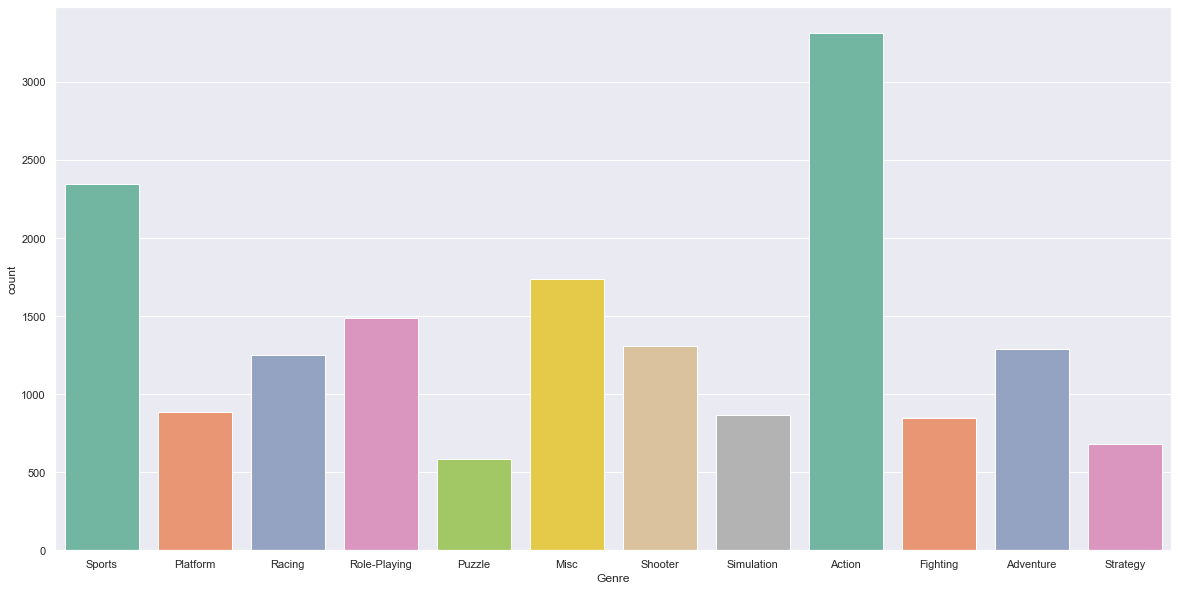

In [6]:
sns.set(rc={'figure.figsize':(20,10)})
sns_plt = sns.countplot(x='Genre', data=DS, palette="Set2")

In [7]:
DS2 = DS.copy()

In [8]:
DS2['Genre'] = DS2['Genre'].replace({'Action':0,
                                   'Sports':1,
                                   'Misc':2,
                                   'Role-Playing':3,
                                   'Shooter':4,
                                   'Adventure':5,
                                   'Racing':6,
                                   'Platform':7,
                                   'Simulation':8,
                                   'Fighting':9,
                                   'Strategy':10,
                                   'Puzzle':11})

In [9]:
DS2['Genre'].value_counts()

0     3316
1     2346
2     1739
3     1488
4     1310
5     1286
6     1249
7      886
8      867
9      848
10     681
11     582
Name: Genre, dtype: int64

In [31]:
DS2.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,1,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,7,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,1,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,3,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
# feature_columns = [col for col in DS2.columns if col not in ['class', 'name', 'text', 'type']]
feature_columns = [col for col in DS2.columns if col not in ['Genre', 'Name', 'Platform', 'Publisher','Year']]
x = DS2[feature_columns]
y = DS2['Genre']

In [52]:
x.head(5)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,82.74
1,2,29.08,3.58,6.81,0.77,40.24
2,3,15.85,12.88,3.79,3.31,35.82
3,4,15.75,11.01,3.28,2.96,33.00
4,5,11.27,8.89,10.22,1.00,31.37


In [53]:
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = SEED)

In [65]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [80]:
model = MLPClassifier(hidden_layer_sizes=(100,100), activation='tanh')

In [81]:
model.fit(train_x, train_y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100))

In [82]:
y_hat = model.predict(test_x)

In [83]:
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
confusion_matrix(test_y, y_hat)

array([[647,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [489,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [346,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [298,   0,   0,   5,   0,   0,   0,   1,   0,   0,   0,   0],
       [285,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [258,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [238,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [181,   0,   0,   1,   0,   0,   0,   2,   0,   0,   0,   1],
       [155,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [105,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [85]:
precision_recall_fscore_support(test_y, y_hat)

c:\users\ulaan saan\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.1956456 , 0.        , 0.        , 0.83333333, 0.        ,
        0.        , 0.        , 0.66666667, 0.        , 0.        ,
        0.        , 0.        ]),
 array([1.        , 0.        , 0.        , 0.01644737, 0.        ,
        0.        , 0.        , 0.01081081, 0.        , 0.        ,
        0.        , 0.        ]),
 array([0.32726353, 0.        , 0.        , 0.03225806, 0.        ,
        0.        , 0.        , 0.0212766 , 0.        , 0.        ,
        0.        , 0.        ]),
 array([647, 490, 346, 304, 286, 258, 239, 185, 155, 162, 143, 105],
       dtype=int64))

In [86]:
accuracy_score(test_y, y_hat)

0.19698795180722892

In [54]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [55]:
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)

Iteration 1, loss = 11586817026269720217101618249548223742696968374836091734997279309729212358677398590605002086253757074808766228763241278443642700781114621952.00000000
Iteration 2, loss = 76985478838080788312098242669602650779891204410130479194042738769547714485092200957960192127571235719930146182466353719356042982611894290445273801848840454393684790115561997710977622658183764320660601613113504592857121799070005913330909184000.00000000
Iteration 3, loss = 104637843568861231292750378956706818055290910940511207214619896252815506509753855402207281111749190949974516014666885667542794666929780989644948671127454650430082142749928557809196733980067592968138247943056685798486280850390748500047245082624.00000000
Iteration 4, loss = 104674536904706563745375993577025898935453127553248658704106895812807088008067609628450839471979605279582733831118185638291244131234794762067085893114684854968008138149159858224529073383005492550812385794190451295110234269505510117188185358336.00000000
Iteration 5,

In [48]:
accuracy_score(test_y, y_pred)

0.20481927710843373

In [49]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[680,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [474,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [318,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [292,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [266,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [271,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [264,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [174,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [158,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [170,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [140,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

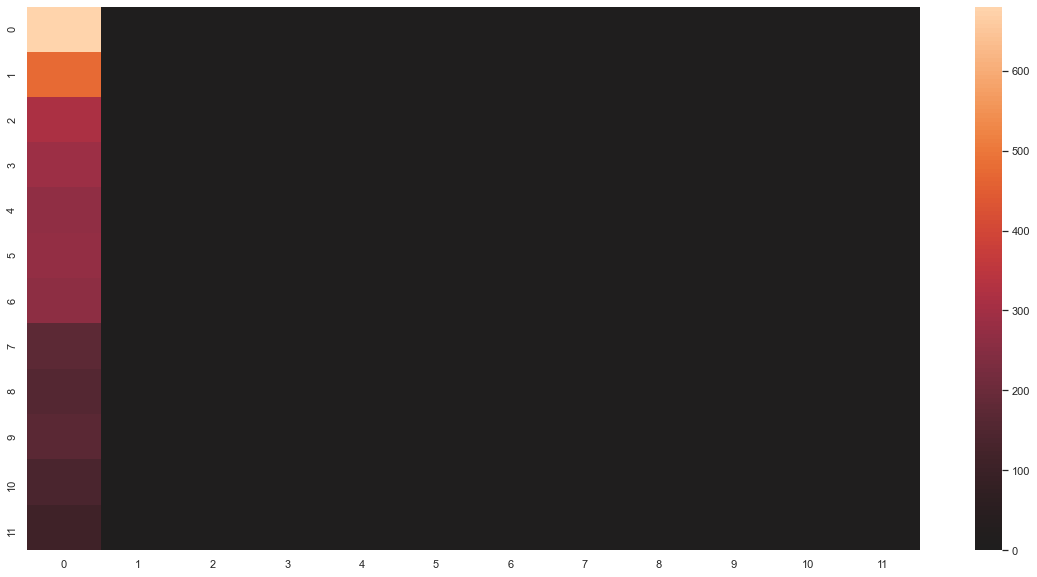

In [50]:
sns.heatmap(cm, center=True)
plt.show()